In [2]:
#from pytorch_lightning import LightningModule, Trainer
#import torch
#from torch.utils.data import DataLoader, TensorDataset, SubsetRandomSampler, Subset
#import torch.nn as nn
#import torch.nn.functional as F
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

### Import datasets

In [20]:
train_dataset = pd.read_csv("/Users/georg/Desktop/Projects/titanic/Titanic/train.csv")
test_dataset = pd.read_csv("/Users/georg/Desktop/Projects/titanic/Titanic/test.csv")

In [4]:
train_dataset

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [7]:
test_dataset

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

### Baselines

##### Based on majority class

In [8]:
print("Survived: ", len(train_dataset.loc[train_dataset["Survived"] == 1]))
print("Died: ", len(train_dataset.loc[train_dataset["Survived"] == 0]))
print("Assign majority class: Everybody died (assign label 0 to every person in test set)")
print("Yielded accuracy: 0.622")

Survived:  342
Died:  549
Assign majority class: Everybody died (assign label 0 to every person in test set)
Yielded accuracy: 0.622


In [9]:
# # Write majority class prediction
# test_dataset["Survived"] = 0
# test_dataset_baseline_majority = test_dataset[['PassengerId', 'Survived']]
# test_dataset_baseline_majority.to_csv("./predictions/test_csv_baseline_majority.csv", index=False)

##### Based on feature classes

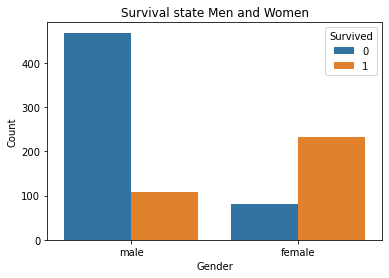

In [16]:
plt.figure(figsize=(6, 4))
sn.countplot(x=train_dataset["Sex"], hue=train_dataset["Survived"])
plt.title("Survival state Men and Women")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
#plt.savefig("survival_men_woman.png")

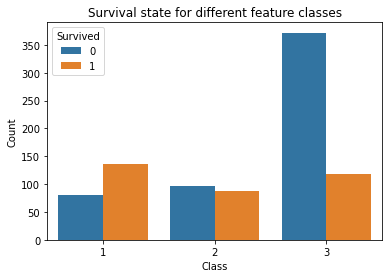

In [18]:
plt.figure(figsize=(6, 4))
sn.countplot(x=train_dataset["Pclass"], hue=train_dataset["Survived"])
plt.title("Survival state for different feature classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
#plt.savefig("survival_classes.png")

We can construct different feature classes for the passengers given their Sex and Class parameter value. We predict their survival according to the class they belong to:

- Male & 3rd class: 0
- Male & 2nd class: 0
- Male & 1st class: 0
- Female & 3rd class: 0
- Female & 2nd class: 1
- Female & 1st class: 1

In [10]:
print("Assign feature classes: Females in 2nd and 1st class survived, rest died")
print("Yielded accuracy: 0.77511")

Assign feature classes: Females in 2nd and 1st class survived, rest died
Yielded accuracy: 0.77511


In [11]:
# Write feature class prediction
# td_cl = test_dataset
# td_cl["Survived"] = 0
# td_cl.loc[(td_cl['Sex'] == "female") & (td_cl['Pclass'] == 2), 'Survived'] = 1
# td_cl.loc[(td_cl['Sex'] == "female") & (td_cl['Pclass'] == 1), 'Survived'] = 1
# td_cl = td_cl[['PassengerId', 'Survived']]
# td_cl.to_csv("./predictions/test_csv_feature_classes.csv", index=False)

##### Excursion: Principal Component Analysis

In [23]:
train_pca = train_dataset.copy()
train_pca.loc[train_pca["Sex"] == "female", "Sex"] = 1
train_pca.loc[train_pca["Sex"] == "male", "Sex"] = 0
train_pca = train_pca[["Pclass", "Sex", "Age", "Parch", "Fare"]]
train_pca = train_pca.dropna()
train_pca

Pclass Sex   Age  Parch     Fare
0         3   0  22.0      0   7.2500
1         1   1  38.0      0  71.2833
2         3   1  26.0      0   7.9250
3         1   1  35.0      0  53.1000
4         3   0  35.0      0   8.0500
..      ...  ..   ...    ...      ...
885       3   1  39.0      5  29.1250
886       2   0  27.0      0  13.0000
887       1   1  19.0      0  30.0000
889       1   0  26.0      0  30.0000
890       3   0  32.0      0   7.7500

[714 rows x 5 columns]

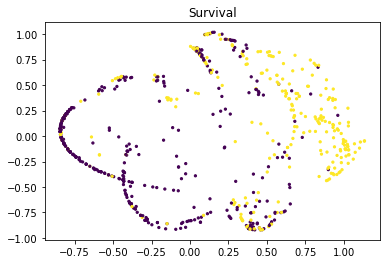

In [32]:
# PCA
pca = PCA(n_components=2)
preprocessed_train = preprocessing.normalize(preprocessing.scale(train_pca))
#missing feature scaling and normalization
pca.fit(preprocessed_train)
trans = pca.transform(preprocessed_train)
# Plotting
trdf = train_dataset[train_dataset['Age'].notna()]
plt.scatter(trans[:,0], trans[:,1], s=5, c=trdf['Survived'])
plt.title("Survival")
plt.show()

## Linear regression

In [55]:
X = train_dataset.copy()
X.loc[X["Sex"] == "female", "Sex"] = 1
X.loc[X["Sex"] == "male", "Sex"] = 0
X.drop(['Ticket', 'Cabin', 'Embarked', 'Name', 'PassengerId', 'Age'],axis=1,inplace=True)
y = X['Survived'] #trying to predict
X.drop('Survived',axis=1,inplace=True)
X

Pclass Sex  SibSp  Parch     Fare
0         3   0      1      0   7.2500
1         1   1      1      0  71.2833
2         3   1      0      0   7.9250
3         1   1      1      0  53.1000
4         3   0      0      0   8.0500
..      ...  ..    ...    ...      ...
886       2   0      0      0  13.0000
887       1   1      0      0  30.0000
888       3   1      1      2  23.4500
889       1   0      0      0  30.0000
890       3   0      0      0   7.7500

[891 rows x 5 columns]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [59]:
predictions = logmodel.predict(X_test)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.78      0.64      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



In [26]:
#
#
#
#
#
#
#
#
#
#
#
#

In [28]:
classes = [1,2,3]
survival_rate = []

for cls in classes:
    survivors = len(train_dataset.loc[(train_dataset["Pclass"] == cls) & (train_dataset["Survived"] == 1)])
    dead = len(train_dataset.loc[(train_dataset["Pclass"] == cls) & (train_dataset["Survived"] == 0)])
    percentage = survivors / (survivors + dead)
    survival_rate.append(percentage)
data = pd.DataFrame({"class": classes, "survival_rate": survival_rate})

In [29]:
data

class  survival_rate
0      1       0.629630
1      2       0.472826
2      3       0.242363

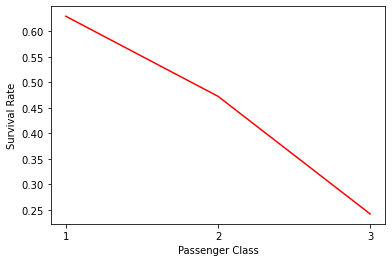

In [30]:
plt.xticks([1,2,3])
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.plot(data["class"], data["survival_rate"], "r")